In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


## Load raw data

In [2]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'country risk 2019 data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713


## Simple exploratory analysis
### Print summary statistics
Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [3]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


### Plot histogram

Note that distributions for GDP Growth is quite skewed.

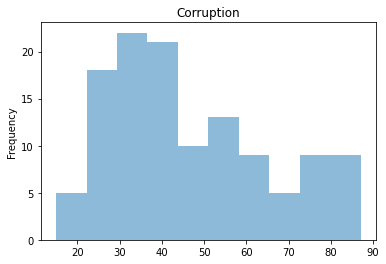

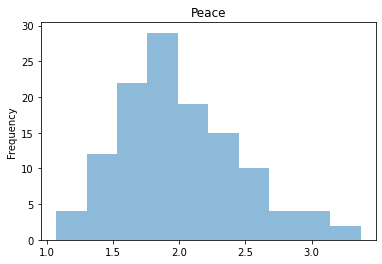

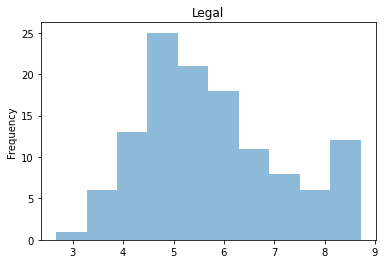

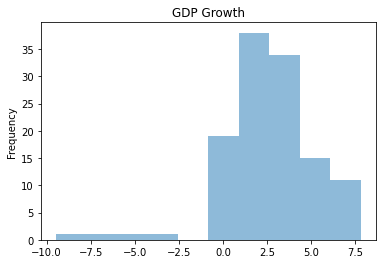

In [4]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

## K means cluster
### Pick features & normalization

Since Corruption and Legal are highly correlated, we drop the Courrption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [5]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


In [6]:
X2 = raw[['Peace', 'Legal', 'GDP Growth', 'Corruption']]
X2 = (X2 - X2.mean()) / X2.std()
print(X2.head(5))

      Peace     Legal  GDP Growth  Corruption
0 -0.390081 -0.878158    0.126952   -0.633230
1  0.472352 -0.958948   -0.040772   -0.633230
2 -0.026039 -0.484397   -2.230541   -0.098542
3  0.634871 -0.684553    1.303747   -0.258948
4 -1.261182  1.900001   -0.368418    1.612460


### Perform elbow method

The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

C:\Users\xomai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


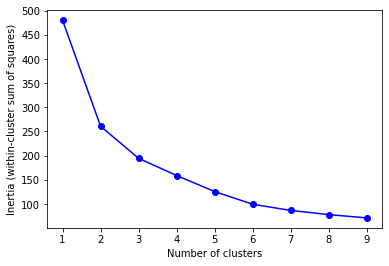

In [7]:

Ks = range(1, 10)
inertia = [KMeans(i).fit(X2).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

C:\Users\xomai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


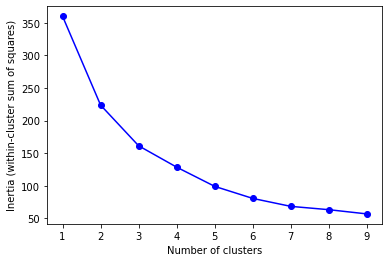

In [8]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

### K means with k=3

In [62]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.1333871005255
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


In [64]:
unique, frequency = np.unique(y, 
                              return_counts = True)
print(unique)
print(frequency)

[0 1 2]
[22 46 53]


### Visualize the result (3D plot)

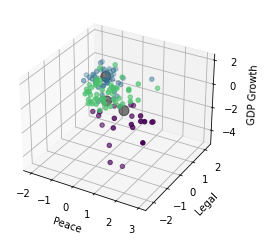

In [10]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### Visualize the result (3 2D plots)

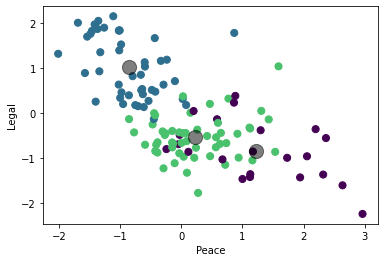

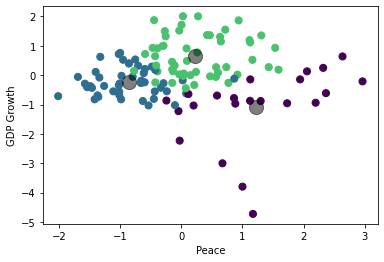

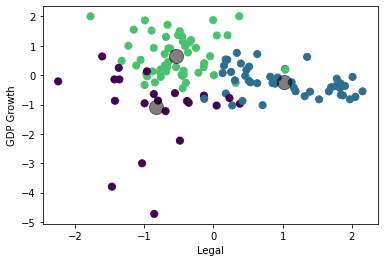

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### Visualize the result (3 2D plots)
plot country abbreviations instead of dots.

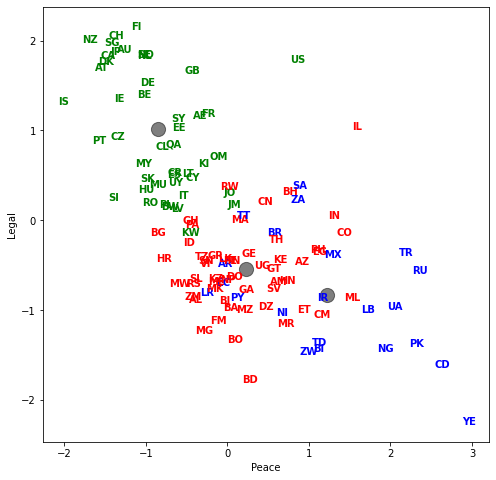

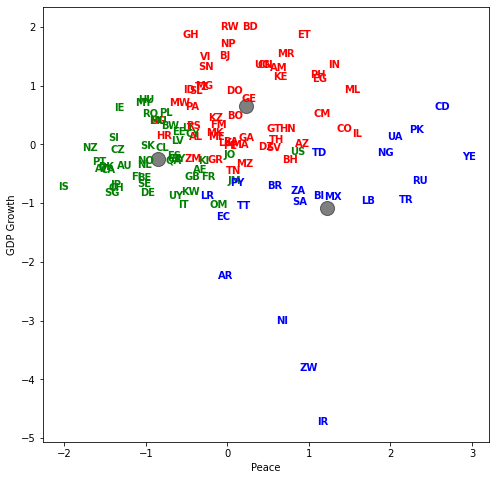

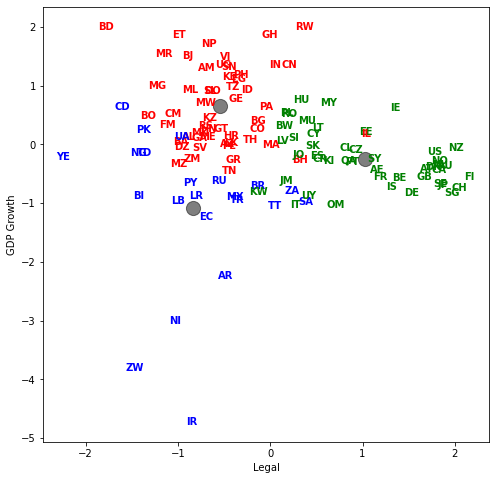

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [13]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
14                         Brazil     BR

In [14]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.3509139523852161
For n_clusters= 3 The average silhouette_score is : 0.3558522334350506
For n_clusters= 4 The average silhouette_score is : 0.3372449209416129
For n_clusters= 5 The average silhouette_score is : 0.34438420977393375
For n_clusters= 6 The average silhouette_score is : 0.34875382122984605
For n_clusters= 7 The average silhouette_score is : 0.3603542108728006
For n_clusters= 8 The average silhouette_score is : 0.3394917368960437
For n_clusters= 9 The average silhouette_score is : 0.3152647236003266
For n_clusters= 10 The average silhouette_score is : 0.3090796538425007


# B

In [52]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1, n_init= 2)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 169.2424290863102
cluster centers:  [[ 0.53110654 -0.61456608  0.34774502]
 [-0.85103491  0.99692377 -0.22524313]
 [ 0.70529573 -0.95894794 -3.43893096]]
cluster labels:  [0 0 2 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 2 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 2]


In [53]:
unique, frequency = np.unique(y, 
                              return_counts = True)
print(unique)
print(frequency)

[0 1 2]
[70 47  4]


In [16]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
0                         Albania     AL      0
81                       Pakistan     PK      0
78                        Nigeria     NG      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
82                         Panama     PA      0
67                     Mauritania     MR      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
119                        Zambia     ZM      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
50                         Israel     IL      0
47                      Indonesia     ID      0
66                           Mali     ML

In [65]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1, n_init= 40)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.1333871005255
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


In [66]:
unique, frequency = np.unique(y, 
                              return_counts = True)
print(unique)
print(frequency)

[0 1 2]
[22 46 53]


In [18]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
14                         Brazil     BR

In [54]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1, n_init= 100)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.1333871005255
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


In [55]:
unique, frequency = np.unique(y, 
                              return_counts = True)
print(unique)
print(frequency)

[0 1 2]
[22 46 53]


In [21]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
14                         Brazil     BR

# C

In [57]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X2)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y2 = kmeans.labels_
print("cluster labels: ", y2)

inertia for k=3 is 194.4046655009297
cluster centers:  [[-0.89877793  1.12417837 -0.26007806  1.17949284]
 [ 0.17066495 -0.47838646  0.5929059  -0.49863571]
 [ 1.22506036 -0.83385901 -1.07842464 -0.88356071]]
cluster labels:  [1 1 2 1 0 0 1 1 1 0 1 1 1 0 2 1 2 1 0 2 0 1 1 0 1 0 0 2 0 1 2 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 2 0 1 0 1 0 1 1 1 0 1 0 2 2 0 1 1 0 1 1 0 2 1 1 1 1
 1 0 0 2 2 0 0 2 1 2 1 1 0 0 0 1 2 1 2 1 1 1 0 0 0 2 0 1 0 0 0 1 1 1 2 1 2
 1 2 0 0 0 0 1 2 1 2]


C:\Users\xomai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


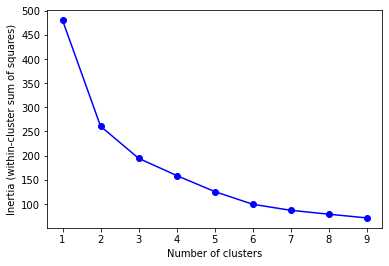

In [58]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(X2).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [59]:
unique, frequency = np.unique(y2, 
                              return_counts = True)
print(unique)
print(frequency)

[0 1 2]
[41 58 22]


In [24]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y2})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
51                          Italy     IT      0
33                        Estonia     EE      0
35                        Finland     FI      0
36                         France     FR      0
39                        Germany     DE      0
45                        Iceland     IS      0
49                        Ireland     IE      0
53                          Japan     JP      0
57                  Korea (South)     KI      0
59                         Latvia     LV      0
62                      Lithuania     LT      0
65                       Malaysia     MY      0
68                      Mauritius     MU      0
75                    Netherlands     NL      0
76                    New Zealand     NZ      0
79                         Norway     NO      0
80                           Oman     OM      0
86                         Poland     PL      0
87                       Portugal     PT      0
88                          Qatar     QA

# D

In [69]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters = 3)


In [70]:
AC.fit(X)

AgglomerativeClustering(n_clusters=3)

In [71]:
y_ac = AC.labels_
print(y_ac)

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y_ac})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 2 0 1 2 1 0 0 1 0 1 1 2 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 0 0 0 1 0 0 0 1 0 0 2 0 1 0 0 1 0 0 0 2 0 0 0 0
 0 1 1 2 2 1 0 2 0 0 0 0 0 1 1 0 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 2
 0 2 1 1 0 0 0 2 0 2]
                          Country Abbrev  Label
0                         Albania     AL      0
70                        Moldova     FM      0
68                      Mauritius     MU      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
119                        Zambia     ZM      0
71                     Montenegro     ME      0
59                         Latvia     LV      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
108           Trinidad and Tobago     TT      0
52                        Jamaica

In [77]:
print(AC.n_features_in_)

3


In [72]:
unique, frequency = np.unique(y_ac, 
                              return_counts = True)
print(unique)
print(frequency)

[0 1 2]
[73 34 14]


In [79]:
AC = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
AC.fit(X)

y_ac = AC.labels_
print(y_ac)

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y_ac})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 1 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 2 0 0 0 0 0 2 0 1]
                          Country Abbrev  Label
0                         Albania     AL      0
76                    New Zealand     NZ      0
75                    Netherlands     NL      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
111                        Uganda     UG      0
68                      Mauritius     MU      0
67                     Mauritania     MR      0
109                       Tunisia     TN      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar

In [80]:
unique, frequency = np.unique(y_ac, 
                              return_counts = True)
print(unique)
print(frequency)

[0 1 2]
[106   4  11]


In [81]:
AC = AgglomerativeClustering(n_clusters = 3, linkage = 'single')
AC.fit(X)

y_ac = AC.labels_
print(y_ac)

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y_ac})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 0]
                          Country Abbrev  Label
120                      Zimbabwe     ZW      0
48                           Iran     IR      0
77                      Nicaragua     NI      0
115                 United States     US      1
50                         Israel     IL      1
86                         Poland     PL      2
85                    Philippines     PH      2
84                           Peru     PE      2
83                       Paraguay     PY      2
82                         Panama     PA      2
81                       Pakistan     PK      2
80                           Oman     OM      2
79                         Norway     NO      2
78                        Nigeria     NG      2
76                    New Zealand

In [82]:
unique, frequency = np.unique(y_ac, 
                              return_counts = True)
print(unique)
print(frequency)

[0 1 2]
[  3   2 116]


In [83]:
AC = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
AC.fit(X)

y_ac = AC.labels_
print(y_ac)

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y_ac})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

[0 0 0 2 0 0 2 0 2 0 2 2 0 0 0 0 2 2 0 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0
 0 2 0 0 0 2 2 0 0 2 0 1 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 2 2 0 2 2 0 0 0
 2 0 0 1 2 0 0 2 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2
 2 2 0 0 0 0 2 2 0 1]
                          Country Abbrev  Label
0                         Albania     AL      0
57                  Korea (South)     KI      0
92                   Saudi Arabia     SA      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
53                          Japan     JP      0
52                        Jamaica     JM      0
51                          Italy     IT      0
58                         Kuwait     KW      0
50                         Israel     IL      0
94                         Serbia     RS      0
47                      Indonesia     ID      0
95                   Sierra Leone     SL      0
45                        Iceland     IS      0
44                        Hungary

In [84]:
unique, frequency = np.unique(y_ac, 
                              return_counts = True)
print(unique)
print(frequency)

[0 1 2]
[81  3 37]


# E

In [31]:
raw2 = raw.append({'Country':'Venezuela', 'Abbrev':'VE', 'Corruption': 16, 'Peace':2.671, 'Legal':2.895, 'GDP Growth':-35 }, ignore_index=True)


C:\Users\xomai\AppData\Local\Temp\ipykernel_30248\3156778534.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  raw2 = raw.append({'Country':'Venezuela', 'Abbrev':'VE', 'Corruption': 16, 'Peace':2.671, 'Legal':2.895, 'GDP Growth':-35 }, ignore_index=True)


In [32]:
raw2

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713
...,...,...,...,...,...,...
117,Vietnam,VI,37,1.877,5.084,6.500
118,Yemen,YE,15,3.369,2.671,2.113
119,Zambia,ZM,34,1.805,4.592,2.021
120,Zimbabwe,ZW,24,2.463,3.738,-7.077


In [33]:
X3 = raw2[['Peace', 'Legal', 'GDP Growth']]
X3 = (X3 - X3.mean()) / X3.std()

In [34]:
X3

,Peace,Legal,GDP Growth
0,-0.400182,-0.849636,0.148881
1,0.458391,-0.929350,0.047927
2,-0.037769,-0.461122,-1.270112
3,0.620183,-0.658611,0.857204
4,-1.267384,1.891504,-0.149286
...,...,...,...
117,-0.279377,-0.463277,0.974593
118,2.939193,-2.196149,-0.055375
119,-0.434697,-0.816602,-0.076974
120,0.984753,-1.429893,-2.212977


C:\Users\xomai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


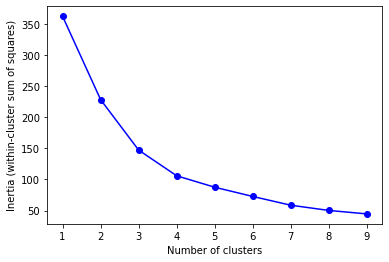

In [35]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(X3).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [36]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X3)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_

inertia for k=3 is 147.3581596115833
cluster centers:  [[ 0.50083526 -0.57899064  0.14262782]
 [ 1.4334541  -2.03528534 -8.76865913]
 [-0.9090402   1.05949011 -0.05031098]]


In [37]:
result = pd.DataFrame({'Country':raw2['Country'], 'Abbrev':raw2['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
78                        Nigeria     NG      0
77                      Nicaragua     NI      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
81                       Pakistan     PK      0
66                           Mali     ML      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
120                      Zimbabwe     ZW      0
58                         Kuwait     KW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
52                        Jamaica     JM

In [38]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1, n_init= 40)
kmeans.fit(X3)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 147.3581596115833
cluster centers:  [[ 0.50083526 -0.57899064  0.14262782]
 [ 1.4334541  -2.03528534 -8.76865913]
 [-0.9090402   1.05949011 -0.05031098]]
cluster labels:  [0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 0 2 0 2 2 0 2 0 0 0 0 2 0 2 2
 0 0 2 0 0 0 0 2 2 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0
 0 2 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 2 0 2 0 2 2 2 0 0 0 0 0 0
 0 0 2 2 2 2 0 0 0 0 1]


In [39]:
result = pd.DataFrame({'Country':raw2['Country'], 'Abbrev':raw2['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
78                        Nigeria     NG      0
77                      Nicaragua     NI      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
81                       Pakistan     PK      0
66                           Mali     ML      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
120                      Zimbabwe     ZW      0
58                         Kuwait     KW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
52                        Jamaica     JM

In [40]:
AC = AgglomerativeClustering(n_clusters = 3)

AC.fit(X3)

y_ac = AC.labels_
print(y_ac)

result = pd.DataFrame({'Country':raw2['Country'], 'Abbrev':raw2['Abbrev'], 'Label':y_ac})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

[0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0
 0 0 1 1 1 1 0 0 0 0 2]
                          Country Abbrev  Label
0                         Albania     AL      0
77                      Nicaragua     NI      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
120                      Zimbabwe     ZW      0
56                          Kenya     KE      0
55                     Kazakhst